# E-Commerce Project: Amazon Prime Video

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import  mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('TVdata.txt', header = 0, index_col = [0])
df.head()

,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,import_id,release_year,genres,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,awards,mpaa,star_category
video_id,,,,,,,,,,,,,,,
385504,307127.605608,1,3,lionsgate,2013,"Action,Thriller,Drama",69614,15000000,42930462,6.5,112.301017,51,other award,PG-13,1.710000
300175,270338.426375,1,3,lionsgate,2013,"Comedy,Crime,Thriller",46705,15000000,3301046,6.5,94.983250,41,no award,R,3.250000
361899,256165.867446,1,3,other,2012,"Crime,Drama",197596,26000000,37397291,7.3,115.763675,58,other award,R,2.646667
308314,196622.720996,3,4,lionsgate,2008,"Thriller,Drama,War,Documentary,Mystery,Action",356339,15000000,15700000,7.6,130.703583,94,Oscar,R,1.666667
307201,159841.652064,1,3,lionsgate,2013,"Crime,Thriller,Mystery,Documentary",46720,27220000,8551228,6.4,105.545533,37,other award,R,3.066667


In [3]:
df.shape    # dataset: 4226 row, 15 column

(4226, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4226 entries, 385504 to 11229
Data columns (total 15 columns):
cvt_per_day                      4226 non-null float64
weighted_categorical_position    4226 non-null int64
weighted_horizontal_poition      4226 non-null int64
import_id                        4226 non-null object
release_year                     4226 non-null int64
genres                           4226 non-null object
imdb_votes                       4226 non-null int64
budget                           4226 non-null int64
boxoffice                        4226 non-null int64
imdb_rating                      4226 non-null float64
duration_in_mins                 4226 non-null float64
metacritic_score                 4226 non-null int64
awards                           4226 non-null object
mpaa                             4226 non-null object
star_category                    4226 non-null float64
dtypes: float64(4), int64(7), object(4)
memory usage: 528.2+ KB


### check duplication data

In [5]:
if df.index.duplicated().sum() == 0:
    print('no duplicated index')

no duplicated index


### check missing value

In [6]:
df.isna().sum()    # no null value --> no missing value?

cvt_per_day                      0
weighted_categorical_position    0
weighted_horizontal_poition      0
import_id                        0
release_year                     0
genres                           0
imdb_votes                       0
budget                           0
boxoffice                        0
imdb_rating                      0
duration_in_mins                 0
metacritic_score                 0
awards                           0
mpaa                             0
star_category                    0
dtype: int64

In [7]:
df.describe()         # There are lots of zero ----> should be missing vlaue

,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,release_year,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,star_category
count,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4.226000e+03,4.226000e+03,4226.000000,4226.000000,4226.000000,4226.000000
mean,4218.630239,7.782537,28.103644,2001.056791,6462.924042,2.150743e+06,2.536338e+06,5.257099,89.556123,15.973734,0.954651
std,13036.079964,6.134183,11.863649,17.496849,31596.006790,7.176604e+06,8.243516e+06,2.122810,21.086183,26.205217,0.955045
min,2.187625,1.000000,1.000000,1916.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,4.037250,0.000000,0.000000
25%,351.168776,4.000000,20.000000,1998.000000,81.000000,0.000000e+00,0.000000e+00,4.300000,82.601712,0.000000,0.000000
50%,1193.499989,6.000000,28.000000,2008.000000,535.000000,0.000000e+00,0.000000e+00,5.800000,90.730308,0.000000,1.000000
75%,3356.788816,9.000000,36.000000,2012.000000,3053.000000,1.500000e+06,0.000000e+00,6.800000,99.500312,41.000000,1.666667
max,307127.605608,41.000000,70.000000,2017.000000,948630.000000,1.070000e+08,1.842088e+08,10.000000,246.016767,100.000000,4.000000


In [8]:
# missing data: 4 features have over 25% of missing values --> budget, boxoffice, metacritic_score, star_category
# in those 4 features, there are 3242 samples have at least one missing data 
df[(df['budget'] == 0)|(df['boxoffice'] == 0)|(df['metacritic_score'] == 0)|(df['star_category'] == 0)].shape

(3242, 15)

In [9]:
# missing data: imdb_votes & imdb_rating
# in those 2 features, there are 344 samples have at least one missing data
df[(df['imdb_votes'] == 0) | (df['imdb_rating'] == 0)].shape

(344, 15)

### cvt_per_day feature

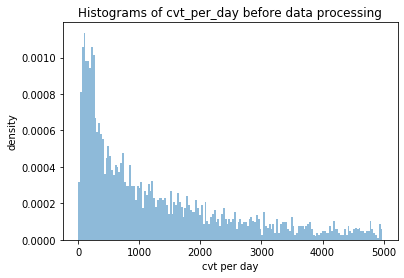

In [10]:
cvt = df['cvt_per_day']
plt.hist(cvt, bins = range(0,5000, 30), label = 'cvt_per_day', density = True, alpha = 0.5)
plt.title('Histograms of cvt_per_day before data processing')
plt.xlabel('cvt per day')
plt.ylabel('density')
plt.show()

### correlation among numerica features

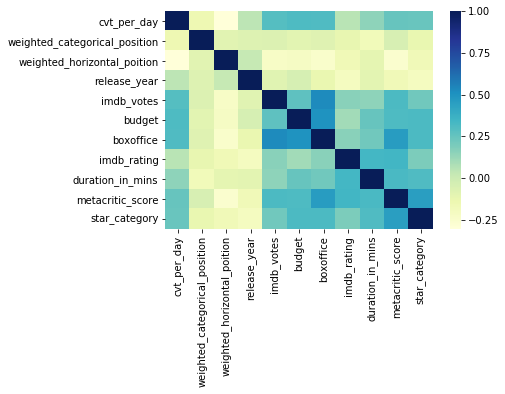

In [11]:
corr = df[['cvt_per_day','weighted_categorical_position','weighted_horizontal_poition','release_year','imdb_votes',
           'budget','boxoffice','imdb_rating','duration_in_mins','metacritic_score','star_category']].corr()
sns.heatmap(corr, cmap = 'YlGnBu')

### distribution of standard categorical features

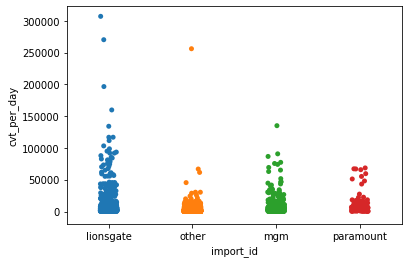

other        2963
lionsgate     677
mgm           445
paramount     141
Name: import_id, dtype: int64


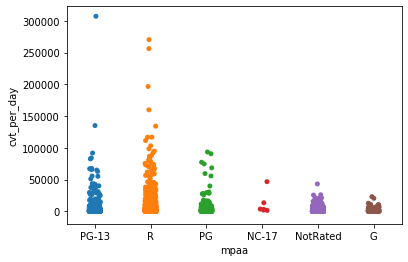

NotRated    2158
R           1158
PG-13        426
PG           353
G            125
NC-17          6
Name: mpaa, dtype: int64


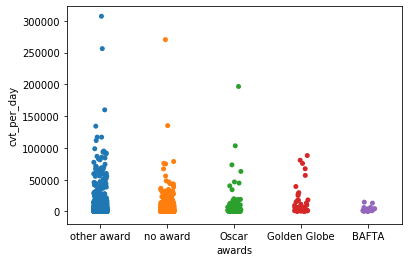

no award        2569
other award     1453
Oscar            141
Golden Globe      44
BAFTA             19
Name: awards, dtype: int64


In [12]:
sns.stripplot(x = 'import_id', y = 'cvt_per_day', data = df, jitter = True)
plt.show()
print(df['import_id'].value_counts())

sns.stripplot(x = 'mpaa', y = 'cvt_per_day', data = df, jitter = True)
plt.show()
print(df['mpaa'].value_counts())

sns.stripplot(x = 'awards', y = 'cvt_per_day', data = df, jitter = True)
plt.show()
print(df['awards'].value_counts())

### distribution of splited genres

In [13]:
df['genres'].head()

video_id
385504                            Action,Thriller,Drama
300175                            Comedy,Crime,Thriller
361899                                      Crime,Drama
308314    Thriller,Drama,War,Documentary,Mystery,Action
307201               Crime,Thriller,Mystery,Documentary
Name: genres, dtype: object

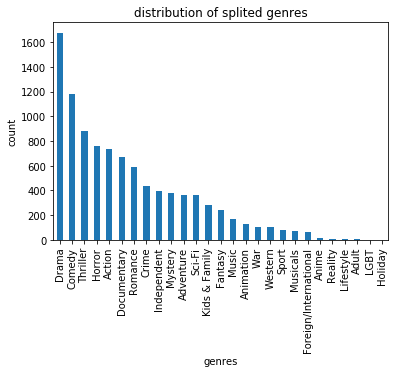

Action                    739
Adult                       3
Adventure                 363
Animation                 129
Anime                      11
Comedy                   1184
Crime                     437
Documentary               671
Drama                    1677
Fantasy                   243
Foreign/International      64
Holiday                     1
Horror                    762
Independent               393
Kids & Family             280
LGBT                        2
Lifestyle                   7
Music                     171
Musicals                   68
Mystery                   375
Reality                     9
Romance                   591
Sci-Fi                    363
Sport                      77
Thriller                  879
War                       102
Western                   102
dtype: int64


In [14]:
gen_split = df['genres'].str.get_dummies(sep = ',').sum()
gen_split.sort_values(ascending = False).plot.bar()
plt.title('distribution of splited genres')
plt.xlabel('genres')
plt.ylabel('count')
plt.show()
print(gen_split)

### distribution of release_year

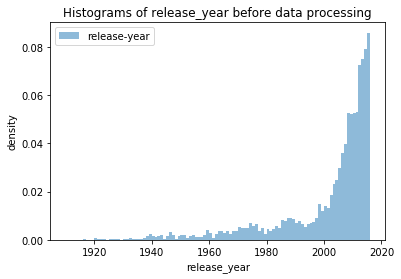

In [15]:
# release_year should be bucketed based on the release_year range
plt.hist(df['release_year'].values, bins = range(1910, 2017,1), label = 'release-year', alpha = 0.5, density = True)
plt.legend(loc = 'upper left')
plt.title('Histograms of release_year before data processing')
plt.xlabel('release_year')
plt.ylabel('density')
plt.show()

## feature preprocessing

In [16]:
# convert 'genres' into dummy variables
# based on the graph of distribution of splited genres, combine the last 6 genres into one as other_genres
d_genres = df['genres'].str.get_dummies(sep = ',').astype(np.int64)
d_genres['other_genres'] = d_genres['Anime']|d_genres['Reality']|d_genres['Lifestyle']|d_genres['Adult']|d_genres['LGBT']|d_genres['Holiday']
d_genres.drop(['Anime', 'Reality','Lifestyle', 'Adult','LGBT','Holiday'], inplace=True, axis=1)
d_genres.head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Fantasy,Foreign/International,Horror,...,Music,Musicals,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,other_genres
video_id,,,,,,,,,,,,,,,,,,,,,
385504,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
300175,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
361899,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
308314,1,0,0,0,0,1,1,0,0,0,...,0,0,1,0,0,0,1,1,0,0
307201,0,0,0,0,1,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [17]:
# bin release_year and convert into dummies
bin_year = [1916, 1974, 1991, 2001, 2006, 2008, 2010, 2012, 2013, 2014, 2017]
year_range = ['1916-1974', '1974-1991', '1991-2001', '2001-2006','2006-2008','2008-2010','2010-2012','2012-2013',
              '2013-2014','2014-2017']
year_bin = pd.cut(df['release_year'], bin_year, labels=year_range)
d_year = pd.get_dummies(year_bin).astype(np.int64)
d_year.head()

,1916-1974,1974-1991,1991-2001,2001-2006,2006-2008,2008-2010,2010-2012,2012-2013,2013-2014,2014-2017
video_id,,,,,,,,,,
385504,0,0,0,0,0,0,0,1,0,0
300175,0,0,0,0,0,0,0,1,0,0
361899,0,0,0,0,0,0,1,0,0,0
308314,0,0,0,0,1,0,0,0,0,0
307201,0,0,0,0,0,0,0,1,0,0


In [18]:
df.drop(['genres','release_year'], axis = 1, inplace = True)
df0 = pd.get_dummies(df,columns = ['import_id','mpaa','awards']).astype(np.int64)
df0.head()

,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,star_category,...,mpaa_NC-17,mpaa_NotRated,mpaa_PG,mpaa_PG-13,mpaa_R,awards_BAFTA,awards_Golden Globe,awards_Oscar,awards_no award,awards_other award
video_id,,,,,,,,,,,,,,,,,,,,,
385504,307127,1,3,69614,15000000,42930462,6,112,51,1,...,0,0,0,1,0,0,0,0,0,1
300175,270338,1,3,46705,15000000,3301046,6,94,41,3,...,0,0,0,0,1,0,0,0,1,0
361899,256165,1,3,197596,26000000,37397291,7,115,58,2,...,0,0,0,0,1,0,0,0,0,1
308314,196622,3,4,356339,15000000,15700000,7,130,94,1,...,0,0,0,0,1,0,0,1,0,0
307201,159841,1,3,46720,27220000,8551228,6,105,37,3,...,0,0,0,0,1,0,0,0,0,1


In [19]:
df1 = pd.concat([df0, d_genres, d_year], axis=1)
df1.head()

,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,star_category,...,1916-1974,1974-1991,1991-2001,2001-2006,2006-2008,2008-2010,2010-2012,2012-2013,2013-2014,2014-2017
video_id,,,,,,,,,,,,,,,,,,,,,
385504,307127,1,3,69614,15000000,42930462,6,112,51,1,...,0,0,0,0,0,0,0,1,0,0
300175,270338,1,3,46705,15000000,3301046,6,94,41,3,...,0,0,0,0,0,0,0,1,0,0
361899,256165,1,3,197596,26000000,37397291,7,115,58,2,...,0,0,0,0,0,0,1,0,0,0
308314,196622,3,4,356339,15000000,15700000,7,130,94,1,...,0,0,0,0,1,0,0,0,0,0
307201,159841,1,3,46720,27220000,8551228,6,105,37,3,...,0,0,0,0,0,0,0,1,0,0


In [20]:
# 53 features in total, show below
col = df1.columns
col

Index(['cvt_per_day', 'weighted_categorical_position',
       'weighted_horizontal_poition', 'imdb_votes', 'budget', 'boxoffice',
       'imdb_rating', 'duration_in_mins', 'metacritic_score', 'star_category',
       'import_id_lionsgate', 'import_id_mgm', 'import_id_other',
       'import_id_paramount', 'mpaa_G', 'mpaa_NC-17', 'mpaa_NotRated',
       'mpaa_PG', 'mpaa_PG-13', 'mpaa_R', 'awards_BAFTA',
       'awards_Golden Globe', 'awards_Oscar', 'awards_no award',
       'awards_other award', 'Action', 'Adventure', 'Animation', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Fantasy', 'Foreign/International',
       'Horror', 'Independent', 'Kids & Family', 'Music', 'Musicals',
       'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western',
       'other_genres', '1916-1974', '1974-1991', '1991-2001', '2001-2006',
       '2006-2008', '2008-2010', '2010-2012', '2012-2013', '2013-2014',
       '2014-2017'],
      dtype='object')

### Missing Value

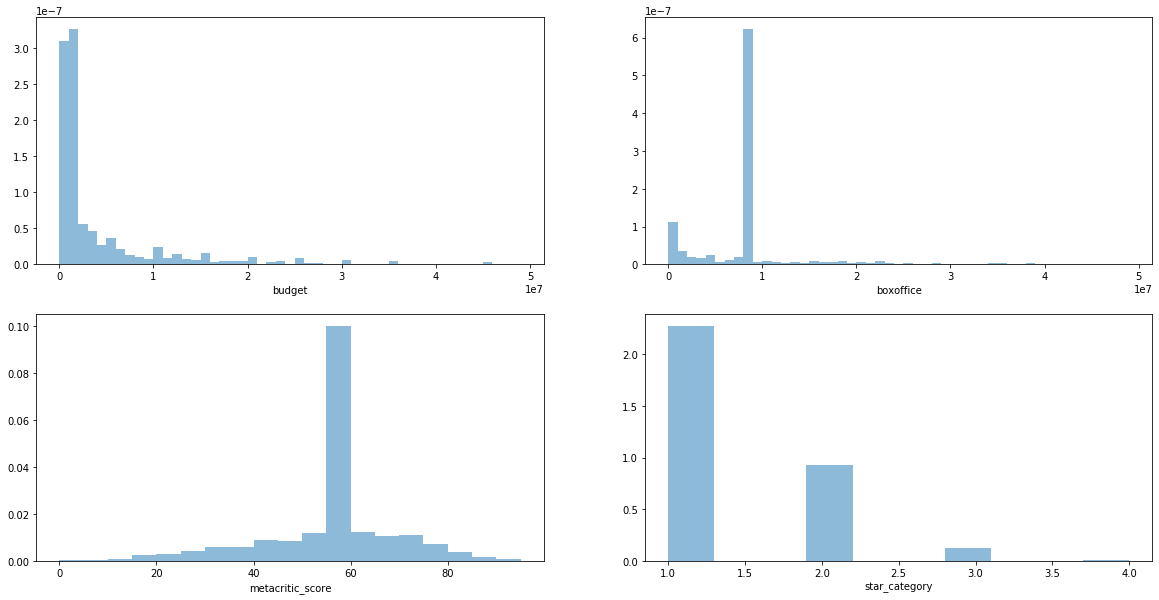

In [21]:
# distribution of features with large amount of missing value
df1[['budget','boxoffice','metacritic_score', 'star_category','imdb_votes', 'imdb_rating']] = df1[['budget','boxoffice','metacritic_score', 'star_category','imdb_votes', 'imdb_rating']].replace(0, np.nan)

fig, a = plt.subplots(2,2,figsize = [20,10])

a[0][0].hist(df1['budget'], bins = range(0, 50000000, 1000000), density = True, alpha = 0.5)
a[0][0].set_xlabel('budget')

a[0][1].hist(df1['boxoffice'], bins = range(0, 50000000, 1000000), density = True, alpha = 0.5)
a[0][1].set_xlabel('boxoffice')

a[1][0].hist(df1['metacritic_score'], bins = range(0, 100, 5), density = True, alpha = 0.5)
a[1][0].set_xlabel('metacritic_score')

a[1][1].hist(df1['star_category'], density = True, alpha = 0.5)
a[1][1].set_xlabel('star_category')

plt.show()

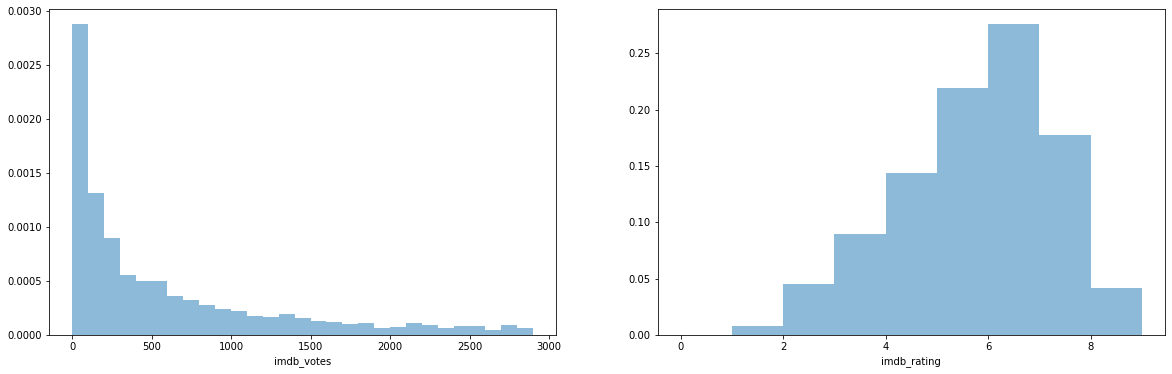

In [22]:
# distribution of features with large amount of missing value
fig, a = plt.subplots(1,2,figsize = [20,6])

a[0].hist(df1['imdb_votes'], bins = range(0, 3000, 100), density = True, alpha = 0.5)
a[0].set_xlabel('imdb_votes')

a[1].hist(df1['imdb_rating'], bins = range(0, 10, 1), density = True, alpha = 0.5)
a[1].set_xlabel('imdb_rating')

plt.show()

In [23]:
# solve missing value problem:
# budget and boxoffice, impute by median value ---> because they have long tails
# metacritic_score and star_category, impute by mean value
# drop NA rows in two features: imdb_votes & imdb_rating?
# or impute imdb_votes by median, impute imdb_rating by mean

TV = df1.copy()
TV['boxoffice'] = TV['boxoffice'].fillna(TV['boxoffice'].median())
TV['metacritic_score'] = TV['metacritic_score'].fillna(TV['metacritic_score'].median())
TV['star_category'] = TV['star_category'].fillna(TV['star_category'].mean())
TV['budget'] = TV['budget'].fillna(TV['budget'].mean())
TV['imdb_votes'] = TV['imdb_votes'].fillna(TV['imdb_votes'].median())
TV['imdb_rating'] = TV['imdb_rating'].fillna(TV['imdb_rating'].mean())
TV.shape

(4226, 57)

### Feature Scaling

In [24]:
# feature scaling --> standard scaling
scale_lst = ['weighted_categorical_position', 'weighted_horizontal_poition', 'budget','boxoffice', 
             'imdb_votes','imdb_rating','duration_in_mins', 'metacritic_score','star_category']
newTV = TV.copy()

sc_scale = StandardScaler().fit(newTV[scale_lst])
newTV[scale_lst] = sc_scale.transform(newTV[scale_lst])

# mm_scale = MinMaxScaler().fit(newTV[scale_lst])
# newTV[scale_lst] = mm_scale.transform(newTV[scale_lst])
newTV.head()

,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,star_category,...,1916-1974,1974-1991,1991-2001,2001-2006,2006-2008,2008-2010,2010-2012,2012-2013,2013-2014,2014-2017
video_id,,,,,,,,,,,,,,,,,,,,,
385504,307127,-1.105826,-2.116264,1.997882,1.470049,4.864658,0.496610,1.087958,-0.762808,-0.846376,...,0,0,0,0,0,0,0,1,0,0
300175,270338,-1.105826,-2.116264,1.272491,1.470049,-0.816956,0.496610,0.234247,-2.125115,3.871129,...,0,0,0,0,0,0,0,1,0,0
361899,256165,-1.105826,-2.116264,6.050305,3.108277,4.071375,1.178307,1.230244,0.190807,1.512377,...,0,0,0,0,0,0,1,0,0,0
308314,196622,-0.779746,-2.031963,11.076745,1.470049,0.960665,1.178307,1.941670,5.095111,-0.846376,...,0,0,0,0,1,0,0,0,0,0
307201,159841,-1.105826,-2.116264,1.272966,3.289972,-0.064244,0.496610,0.755959,-2.670037,3.871129,...,0,0,0,0,0,0,0,1,0,0


## Model Training

In [50]:
model_train, model_test = train_test_split(newTV, test_size=0.15, random_state = 3)
model_train_x = model_train.drop(['cvt_per_day'], axis = 1)
model_test_x = model_test.drop(['cvt_per_day'], axis = 1)
model_train_y = model_train['cvt_per_day']
model_test_y = model_test['cvt_per_day']

In [51]:
y = model_train['cvt_per_day']
X = model_train.drop(['cvt_per_day'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state=0)

### Lasso Linear Regression

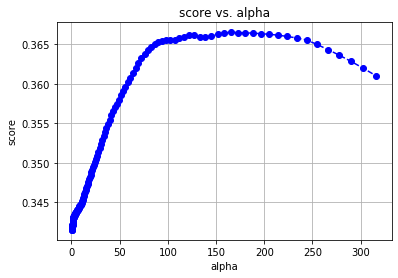

The optimaized alpha and score of Lasso linear is: 


(None, 165.24213795080615, 0.3665110306198719)

In [52]:
alphas = np.logspace (-0.3, 2.5, num=150)
scores = np.empty_like(alphas)
opt_a = float('-inf')
max_score = float('-inf')
for i, a in enumerate(alphas):
    lasso = Lasso()
    lasso.set_params(alpha = a)
    lasso.fit(X_train, y_train)
    scores[i] = lasso.score(X_test, y_test)
    if scores[i] > max_score:
        max_score = scores[i]
        opt_a = a
        lasso_save = lasso
plt.plot(alphas, scores, color='b', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=6)
plt.xlabel('alpha')
plt.ylabel('score')
plt.grid(True)
plt.title('score vs. alpha')
plt.show()
print ('The optimaized alpha and score of Lasso linear is: '), opt_a, max_score

In [28]:
lasso_f = Lasso()
lasso_f.set_params(alpha = opt_a)
lasso_f.fit(model_train_x, model_train_y)

Lasso(alpha=165.24213795080615, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

### Lasso Linear Regression Polynomial-2

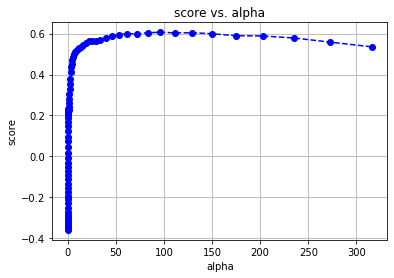

The optimaized alpha and score of Lasso polynomial is: 


(None, 96.28182281933307, 0.6066586077441645)

In [29]:
poly = PolynomialFeatures(2)
Xp_train= poly.fit_transform(X_train)
Xp_test = poly.fit_transform(X_test)

alphas = np.logspace (-2.6, 2.5, num=80)
scores = np.empty_like(alphas)
opt_a = float('-inf')
max_score = float('-inf')
for i, a in enumerate(alphas):
    lasso = Lasso()
    lasso.set_params(alpha = a)
    lasso.fit(Xp_train, y_train)
    scores[i] = lasso.score(Xp_test, y_test)
    if scores[i] > max_score:
        max_score = scores[i]
        opt_a = a
        lasso_save = lasso
        
plt.plot(alphas, scores, color='b', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=6)
plt.xlabel('alpha')
plt.ylabel('score')
plt.grid(True)
plt.title('score vs. alpha')
plt.show()
print ('The optimaized alpha and score of Lasso polynomial is: '), opt_a, max_score

In [30]:
model_train_xp = poly.fit_transform(model_train_x)

lasso_fp = Lasso()
lasso_fp.set_params(alpha = opt_a)
lasso_fp.fit(model_train_xp, model_train_y)

Lasso(alpha=96.28182281933307, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

### Ridge Linear Regression

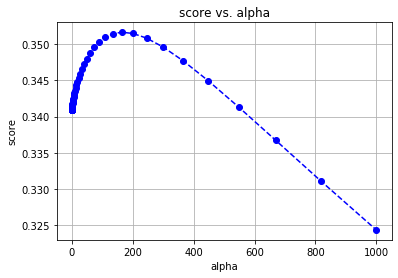

The optimaized alpha and score of Lasso linear is: 


(None, 163.97026580002054, 0.3516388133213527)

In [31]:
alphas = np.logspace (-10, 3, num=150)
scores = np.empty_like(alphas)
opt_a = float('-inf')
max_score = float('-inf')
for i, a in enumerate(alphas):
    ridge = Ridge()
    ridge.set_params(alpha = a)
    ridge.fit(X_train, y_train)
    scores[i] = ridge.score(X_test, y_test)
    if scores[i] > max_score:
        max_score = scores[i]
        opt_a = a
        ridge_save = ridge
plt.plot(alphas, scores, color='b', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=6)
plt.xlabel('alpha')
plt.ylabel('score')
plt.grid(True)
plt.title('score vs. alpha')
plt.show()
print ('The optimaized alpha and score of Lasso linear is: '), opt_a, max_score

In [32]:
ridge_f = Ridge()
ridge_f.set_params(alpha = opt_a)
ridge_f.fit(model_train_x, model_train_y)

Ridge(alpha=163.97026580002054, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

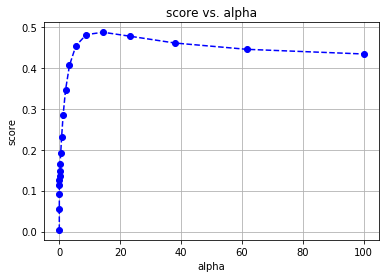

The optimaized alpha and score of Lasso polynomial is: 


(None, 14.38449888287663, 0.48709623086531517)

In [33]:
alphas = np.logspace (-2, 2, num=20)
scores = np.empty_like(alphas)
opt_a = float('-inf')
max_score = float('-inf')
for i, a in enumerate(alphas):
    ridge = Ridge()
    ridge.set_params(alpha = a)
    ridge.fit(Xp_train, y_train)
    scores[i] = ridge.score(Xp_test, y_test)
    if scores[i] > max_score:
        max_score = scores[i]
        opt_a = a
        ridge_save = ridge
        
plt.plot(alphas, scores, color='b', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=6)
plt.xlabel('alpha')
plt.ylabel('score')
plt.grid(True)
plt.title('score vs. alpha')
plt.show()
print ('The optimaized alpha and score of Lasso polynomial is: '), opt_a, max_score

### Random Forest

In [34]:
rf = RandomForestRegressor(random_state=2, max_features='sqrt', n_jobs=-1)
param_grid = {'n_estimators':[55,56,57,58,59,60,61,62,63,64,65],'max_depth':[15,16,17,18,19,20,21]}
clf = GridSearchCV(estimator = rf,param_grid = param_grid,cv = 5,refit = True,n_jobs = -1,pre_dispatch = '2*n_jobs')
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='sqrt',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=-1,
                                             oob_score=False, random_state=2,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [15, 16, 17, 18, 19, 20, 

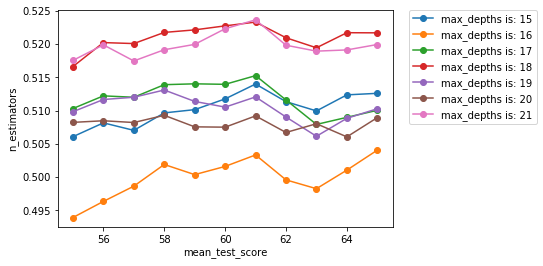

the best parameter for max_depth is: 21
the best parameter for n_estimators is: 61


In [35]:
max_depth = [15,16,17,18,19,20,21]
n_estimators = [55,56,57,58,59,60,61,62,63,64,65]
scores = clf.cv_results_['mean_test_score'].reshape(len(max_depth),len(n_estimators))
plt.figure(1)
plt.subplot(1,1,1)
for i,j in enumerate(max_depth):
    plt.plot(n_estimators, scores[i], '-o', label='max_depths is: '+str(j))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('mean_test_score')
plt.ylabel('n_estimators')
plt.show()
print('the best parameter for max_depth is: '+str(clf.best_params_['max_depth']))
print('the best parameter for n_estimators is: '+str(clf.best_params_['n_estimators']))


## Feature importance

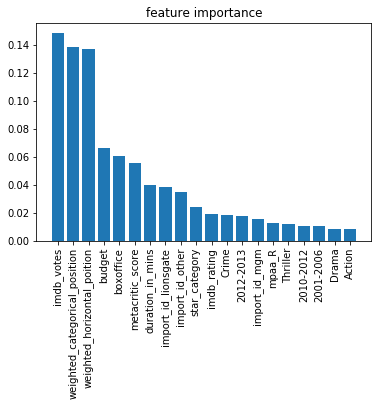

In [39]:
rf_f = RandomForestRegressor(max_depth = 21, n_estimators = 61, max_features='sqrt',random_state=2,n_jobs=-1)
rf_f.fit(model_train_x, model_train_y)
importances = rf_f.feature_importances_
feature_name = X_train.columns.get_values()
indices = np.argsort(importances)[::-1]
plt.figure(1)
plt.bar(feature_name[indices[:20]], importances[indices[:20]])
plt.title('feature importance')
plt.xticks(rotation=90)
plt.show()

In [37]:
# the most important three features are: 
# weighted_categorical_position, imdb_votes, weighted_horizontal_position